<a href="https://colab.research.google.com/github/jvchaaves/llm_project_trilha/blob/main/llm_fashion_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Preparando o ambiente

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import cifar10

import matplotlib.pyplot as plt
import numpy as np

### Carregando os dados

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Dimensões do conjunto de treinamento: (50000, 32, 32, 3)
Dimensões do conjunto de teste: (10000, 32, 32, 3)


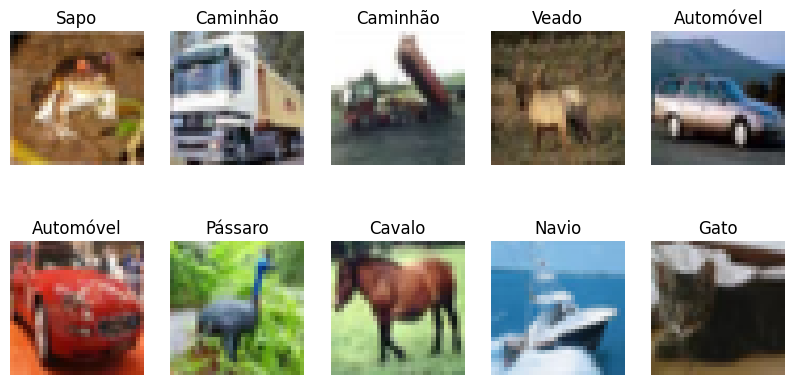

In [ ]:
# Carregando os dados
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Mostrando o tamanho do dataset (dimensão)
print("Dimensões do conjunto de treinamento:", X_train.shape)
print("Dimensões do conjunto de teste:", X_test.shape)

# Classes presentes no dataset
classes = ['Avião', 'Automóvel', 'Pássaro', 'Gato', 'Veado', 'Cachorro', 'Sapo', 'Cavalo', 'Navio', 'Caminhão']
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(classes[y_train[i][0]])
    plt.axis('off')
plt.show()

### Separando os dados entre treino e teste

In [ ]:
# Essa parte serve mais para a normalização dos dados, pois estamos tratando de imagens nesse exemplo
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Construindo o modelo de CNN
# A estrutura do modelo é a seguinte:
# 1. Camada de convolução com 32 filtros de 3x3 e função de ativação ReLU
# 2. Camada de MaxPooling de 2x2
# 3. Camada de convolução com 64 filtros de 3x3 e função de ativação ReLU
# 4. Camada de MaxPooling de 2x2
# 5. Camada de convolução com 128 filtros de 3x3 e função de ativação ReLU
# 6. Camada de Flatten: transforma a matriz em um vetor (imagens 2D para 1D)
# 7. Camada Dense (128 neurônios) com função de ativação ReLU (camada oculta)
# 8. Dropout de 50%: zera 50% dos valores de entrada, evitando overfitting
# 9. Camada Dense (10 neurônios) com função de ativação softmax (camada de saída)

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Para evitar overfitting
    Dense(10, activation='softmax')
])

# Resumo do modelo
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilando o modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Treinando o modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 74s 113ms/step - accuracy: 0.2665 - loss: 1.9456 - val_accuracy: 0.4990 - val_loss: 1.4164
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 65s 86ms/step - accuracy: 0.4847 - loss: 1.4379 - val_accuracy: 0.5374 - val_loss: 1.2884
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.5502 - loss: 1.2645 - val_accuracy: 0.6100 - val_loss: 1.1148
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 84ms/step - accuracy: 0.5993 - loss: 1.1423 - val_accuracy: 0.6218 - val_loss: 1.0723
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 86ms/step - accuracy: 0.6305 - loss: 1.0504 - val_accuracy: 0.6613 - val_loss: 0.9720
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 84ms/step - accuracy: 0.6630 - loss: 0.9718 - val_accuracy: 0.6606 - val_loss: 0.9502
Epoch 7/10


In [ ]:
# Avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Acurácia no conjunto de teste: {test_acc * 100:.2f}%")

In [ ]:
# Plotar perda e acurácia
plt.figure(figsize=(12, 4))

# Perda
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

# Acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

### Agora, vamos testar usando data augmentation

In [ ]:
# Isso é um simples exemplo de como podemos aumentar o dataset, no caso, estamos aumentando as imagens
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Aplicando tudo
datagen.fit(X_train)

# Agora, vamos retreinar o modelo usando o conjunto de dados novo e ver se houve alguma mudança
model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.6540 - loss: 0.9985 - val_accuracy: 0.7084 - val_loss: 0.8691
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.6642 - loss: 0.9814 - val_accuracy: 0.7065 - val_loss: 0.8739
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.6689 - loss: 0.9764 - val_accuracy: 0.7186 - val_loss: 0.8291
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.6727 - loss: 0.9539 - val_accuracy: 0.7189 - val_loss: 0.8597
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.6757 - loss: 0.9394 - val_accuracy: 0.7042 - val_loss: 0.8600
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.6766 - loss: 0.9468 - val_accuracy: 0.7434 - val_loss: 0.7372
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.6752 - loss: 0.9478 - val_accuracy: 0.7294 - val_loss: 0.7986
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.6859 - loss: 0.9250 - 

In [ ]:
# Novamente, devemos avaliar o modelo no conjunto de teste
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Acurácia no conjunto de teste: {test_acc * 100:.2f}%")

313/313 - 1s - 2ms/step - accuracy: 0.7201 - loss: 0.8255
Acurácia no conjunto de teste: 72.01%


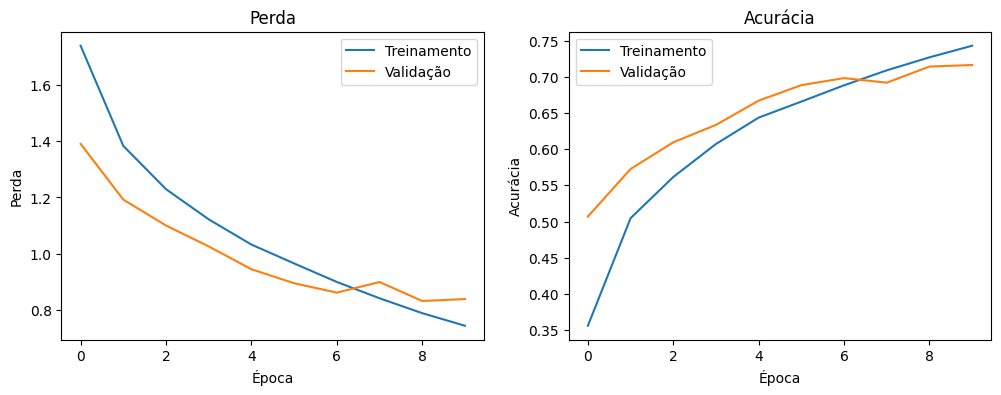

In [ ]:
# Plotando os gráficos de perda e acurácia
plt.figure(figsize=(12, 4))

# Perda
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()

# Acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

# Agora é a sua vez de fazer uma rede de aprendizado profundo usando o dataset
## [Fashion-Mnist](https://www.kaggle.com/datasets/zalando-research/fashionmnist/data)!

In [25]:
import kagglehub


path = kagglehub.dataset_download("zalando-research/fashionmnist")



from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
import numpy as np

Dimensões do conjunto de treinamento: (60000, 28, 28)
Dimensões do conjunto de teste: (10000, 28, 28)


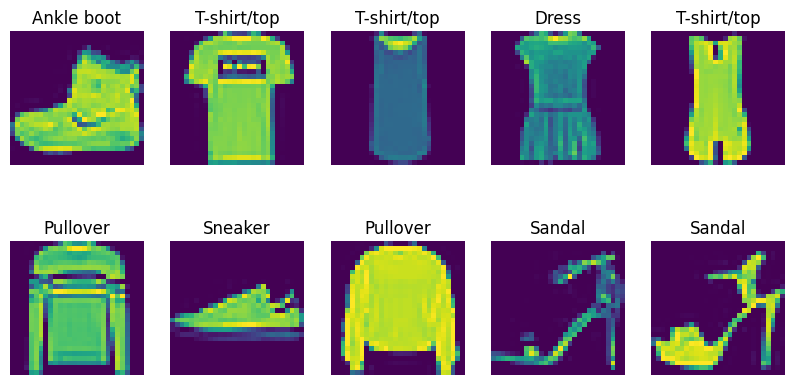

In [26]:
# Carregando os dados
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


print("Dimensões do conjunto de treinamento:", X_train.shape)
print("Dimensões do conjunto de teste:", X_test.shape)


classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(classes[y_train[i]])
    plt.axis('off')
plt.show()



In [28]:
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [21]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28,1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])


model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)



Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.6856 - loss: 0.8748 - val_accuracy: 0.8557 - val_loss: 0.3983
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 66ms/step - accuracy: 0.8477 - loss: 0.4358 - val_accuracy: 0.8758 - val_loss: 0.3337
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.8670 - loss: 0.3759 - val_accuracy: 0.8757 - val_loss: 0.3232
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 65ms/step - accuracy: 0.8807 - loss: 0.3298 - val_accuracy: 0.8958 - val_loss: 0.2816
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 64ms/step - accuracy: 0.8896 - loss: 0.3064 - val_accuracy: 0.9017 - val_loss: 0.2622
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 48s 64ms/step - accuracy: 0.8976 - loss: 0.2845 - val_accuracy: 0.8979 - val_loss: 0.2772
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 79s 61ms/step - accuracy: 0.9049 - loss: 0.2619 - val_accuracy: 0.9071 - val_loss: 0.2586
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.9066 - loss: 0.2535 - 

In [30]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Acurácia no conjunto de teste: {test_acc * 100:.2f}%")

313/313 - 2s - 8ms/step - accuracy: 0.9083 - loss: 0.2551
Acurácia no conjunto de teste: 90.83%


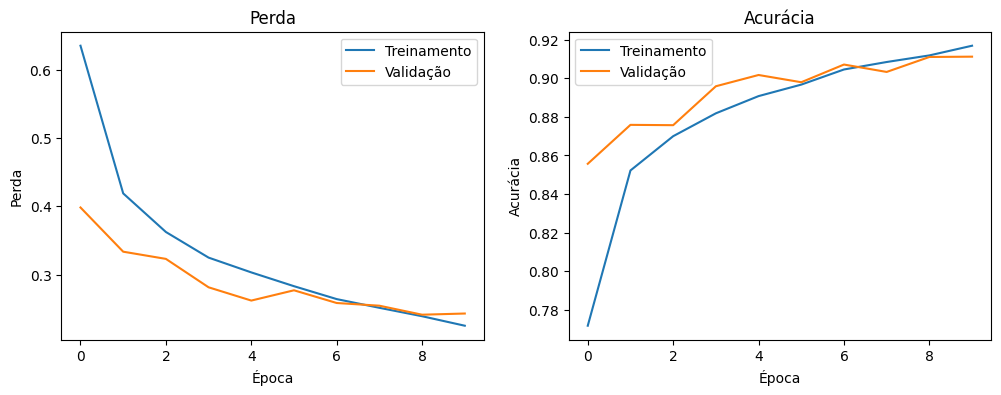

In [31]:
plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

In [32]:
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=False
)



datagen.fit(X_train)

model.fit(datagen.flow(X_train, y_train, batch_size=64), epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 74s 78ms/step - accuracy: 0.8147 - loss: 0.5115 - val_accuracy: 0.8969 - val_loss: 0.2749
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 74s 79ms/step - accuracy: 0.8437 - loss: 0.4230 - val_accuracy: 0.9001 - val_loss: 0.2770
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 74s 79ms/step - accuracy: 0.8567 - loss: 0.3918 - val_accuracy: 0.8936 - val_loss: 0.2848
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 74s 79ms/step - accuracy: 0.8595 - loss: 0.3802 - val_accuracy: 0.8990 - val_loss: 0.2822
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 74s 79ms/step - accuracy: 0.8649 - loss: 0.3706 - val_accuracy: 0.8981 - val_loss: 0.2852
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 75s 80ms/step - accuracy: 0.8681 - loss: 0.3653 - val_accuracy: 0.8909 - val_loss: 0.2959
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 71s 76ms/step - accuracy: 0.8710 - loss: 0.3553 - val_accuracy: 0.9007 - val_loss: 0.2751
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 77s 82ms/step - accuracy: 0.8721 - loss: 0.3460 - 

In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Acurácia no conjunto de teste: {test_acc * 100:.2f}%")

313/313 - 3s - 11ms/step - accuracy: 0.9044 - loss: 0.2675
Acurácia no conjunto de teste: 90.44%


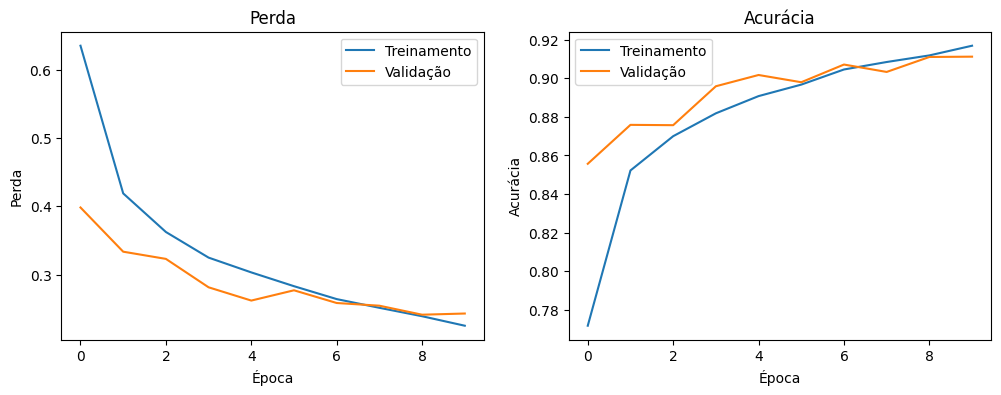

In [34]:
plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Perda')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Acurácia')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.show()